# **Wine Business Concept & Venues Analysis of Brooklyn**
## Applied Data Science Capstone (Coursera / IBM)


## Table of Contents

1.  <a href="#item1">Introduction</a>
    1.  <a href="#item2">Business Description</a>  
3.  <a href="#item3">Data Description</a>  
4.  <a href="#item4">Locate Venues with Foursquare API</a>  
5.  <a href="#item5">K-Means for Clustering</a>
6.  <a href="#item6">Results and Discussion</a>
7.  <a href="#item7">Conclusion</a>

## 1. Introduction

New York City also known as "The Big Apple" or "The City that Never Sleeps”, is the most populous city in the United States.
With an estimated 2019 population of **8,336,817** distributed over about **302.6 square miles (784 km2)**, New York City is also the most densely populated major city in the United States and also one of the world's most populous megacities.
New York City has been described as the cultural, financial, and media capital of the world, significantly influencing commerce, entertainment, research, technology, education, politics, tourism, art, fashion, and sports. [1]

As many as 800 languages are spoken in New York, making it the most linguistically diverse city in the world. New York is home to more than 3.2 million residents born outside the United States, the largest foreign-born population of any city in the world. Basically NYC is a world inside the world.
New York City is composed of five boroughs, each of which is a county of the State of New York. The five boroughs are: Brooklyn, Queens, Manhattan, the Bronx and Staten Island.

**Brooklyn**, the most populous borough, is known for its cultural, social, and ethnic diversity, an independent art scene, distinct neighborhoods, and a distinctive architectural heritage.
Downtown Brooklyn is the largest central core neighborhood in the Outer Boroughs.
The borough has a long beachfront shoreline including Coney Island, established in the 1870s as one of the earliest amusement grounds in the U.S.
Marine Park and Prospect Park are the two largest parks in Brooklyn.
The last decade, Brooklyn has evolved into a thriving hub of entrepreneurship and high technology startup firms and of postmodern art and design and one of the most desire borough to start a new business. [2]


On the other side of the Atlantic Ocean, we can find a small country in size, but a huge country in terms of culture, world history, and a country vast in natural wealth. This country is *Portugal*.

Portugal is the westernmost country and one of the eldest nations in Europe. It is comprised of two parts, a continental part, and two autonomous regions: the archipelagos of the Azores and Madeira. For such a small country it is very diverse in geography from north to south and the capital city boasts 300 days of sunshine per year.
Portugal has been Europe’s best-kept secret for tourism until recent years when it was awarded the World Travel Award for Europe’s Leading Destination.  With nearly 1800km of coastline, Portugal is a world-class destination for beach lovers, it has 17 UNESCO World Heritage Sites and is known for its world-class gastronomy including wine.

To many wine experts, Portugal is the last frontier of wine in Western Europe; there is still so much to be tasted and explored. For serious wine lovers it’s an exciting country to explore since most of the grape varieties are native to the country and not found anywhere else in the world. 
Due to its growing popularity, the biggest challenge is finding Portuguese wines outside of Portugal and especially in the USA.  One might find a wine or two in a specialty store but you most certainly won’t find a dedicated section in your local wine shop. 

## 1.A Business Description

Recently I was approached by an entrepreneur who lived in New York for 15 years and in the last 2 years has lived in Portugal. From early on she fell in love with Portugal and one of the best things the country can offer, Portuguese wine.
Based on her recent passion, this entrepreneur decided to start a wine export business from small Portuguese producers to the United States of America directly to the final consumer.
After the successful launch of the export business this entrepreneur saw an opportunity to open a Portuguese wine store in the borough of Brooklyn in order to make the exclusive wines available to the inhabitants of New York.

With my data scientist skills I will try to **find a place to locate the new wine store**, preferably that is **close to Portuguese restaurants** and located in a **neighborhood where the average base salary is high**, due to the exclusivity of the wines, and without any **wine stores in the vicinity**.


## 2. Data Description

Based on the problem at hand, we need to describe what are our main requisits that will impact our decision and present to potencial investors:
* The wine store should be located in a neighborhood within one of the **highest household income** / **highest population density**
* If possible, should be **near a Portuguese restaurant(s)** in the vicinity
* The **distance** to other wine stores or wine bars

For our analysis to be carried out successfully, it is necessary to obtain data from several sources. The data will be downloaded from:
* **2014 New York City Neighborhood Names** dataset from Spatial Data Repository of NYU. This dataset has all neighborhood's name and respective coordinates
* **2016 New York City Neighborhood Tabulation Areas** dataset from Spatial Data Repository of NYU. This dataset has the geospatial data that can be useful to delimited the neighborhood area
* **Foursquare API** to verify the location of each venue and respective description (restaurant and bar) in our chosen neighborhood
* **Average Household Income** of Brooklyn borough from a New York Real State website (https://ny.curbed.com/)

## Extract the data

First, we need to import the necessary libraries:

In [1]:
import pandas as pd
import requests
import numpy as np
from bs4 import BeautifulSoup
from urllib.error import HTTPError

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

Let's get our respective **data from Brooklyn household Average Income**.

For that we will use **BeautifulSoup** to scrape information from https://www.renthop.com/study/assets/new-york-city-cost-of-living-2017/nyc-2br-median-rent-and-income-table.html where we can find a table with the necessary information.

In [2]:
url = 'https://www.renthop.com/study/assets/new-york-city-cost-of-living-2017/nyc-2br-median-rent-and-income-table.html'
source = requests.get(url)

soup = BeautifulSoup(source.text,'lxml')

#For testing
print(soup.prettify())
print(soup.findAll('Queens'))

<html>
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="content-type"/>
  <title>
   NYC Two Bedroom Median Rent Affordability
  </title>
  <script crossorigin="anonymous" integrity="sha256-ZosEbRLbNQzLpnKIkEdrPv7lOy9C27hHQ+Xp8a4MxAQ=" src="https://code.jquery.com/jquery-1.12.4.min.js">
  </script>
  <link href="https://cdn.datatables.net/v/bs-3.3.7/dt-1.10.13/datatables.min.css" rel="stylesheet" type="text/css"/>
  <script src="https://cdn.datatables.net/v/bs-3.3.7/dt-1.10.13/datatables.min.js" type="text/javascript">
  </script>
  <style type="text/css">
   #title {
		        font-family: "Helvetica Neue", Helvetica, Arial, sans-serif;
		        font-size: 1.2em;
		        color: #4a4a4a;
		        font-weight: 600;
		        -webkit-margin-after: 1em !important;
		        text-align: center;
		        position: relative;
		        width: 100%;
		        top: 10px;
		    }
            .dataTables_filter {
                text-align: left !important;
            }
  </st

After using BeautifulSoup for scraping the data from the URL, I discover that **there isn't any records available to get the data** in our soup.

In [3]:
url = 'https://www.renthop.com/study/assets/new-york-city-cost-of-living-2017/nyc-2br-median-rent-and-income-table.html'
df = pd.read_html(url)

HTTPError: HTTP Error 403: Forbidden

When trying to use pandas to fetch all the data in the url it was give an **HTTP Error 403: Forbidden**.
The HTTP 403 error happens when you try to access a webpage and the site successfully understands your request, but will not authorize it. This can occur when you try to access a site that you don’t have access to.

To get the data correctly, I'll use the old fashion way, copy-paste, and create a csv file and then create the respective dataframe.

In [4]:
avg_income = 'Average_household_income_BRKL.csv'

df_income = pd.read_csv(avg_income, sep=';')
df_income.head()

,Neighborhood,Borough,Two-Bedroom Median Rent,Median Household Income,Income % for Median Rent,Income Required to Lease (40X Rule)
0,Queensbridge-Ravenswood-Long Island City,Queens,"$3,300.00","$28,378",139.54%,"$132,000"
1,Williamsburg,Brooklyn,"$2,499.00","$21,502",139.47%,"$99,960"
2,Lower East Side,Manhattan,"$3,495.00","$31,273",134.11%,"$139,800"
3,Mott Haven-Port Morris,Bronx,"$2,200.00","$20,334",129.83%,"$88,000"
4,East Harlem North,Manhattan,"$2,495.00","$26,099",114.72%,"$99,800"


The information regarding the name and respective coordinates of neighborhoods of New York are on **shape file format**. So, first we will create a function that receives as an argument a shapefile and it will return as a dataframe.

In [5]:
#Install pyshape if needed
#!pip install pyshp

import shapefile

def read_shapefile(shp_path):
    #read file, parse out the records and shapes
    sf = shapefile.Reader(shp_path)
    fields = [x[0] for x in sf.fields][1:]
    records = sf.records()
    shps = [s.points for s in sf.shapes()]

    #write into a dataframe
    df = pd.DataFrame(columns=fields, data=records)
    df = df.assign(coordinates=shps)
    return df

Then we transform our shapefile to a dataframe.

In [6]:
df_neighborhoods = read_shapefile('Datasets/NY_Neighborhoods/NY_neighborhoods_wgs84.shp')
df_neighborhoods.head()

,Name,Stacked,AnnoLine1,AnnoLine2,AnnoLine3,AnnoAngle,Borough,coordinates
0,Wakefield,1,Wakefield,,,0.0,Bronx,"[[-73.84720055104846, 40.89470566842616]]"
1,Co-op City,2,Co-op,City,,0.0,Bronx,"[[-73.82993909620285, 40.87429474550749]]"
2,Eastchester,1,Eastchester,,,0.0,Bronx,"[[-73.82780644113997, 40.88755621287699]]"
3,Fieldston,1,Fieldston,,,0.0,Bronx,"[[-73.90564272128255, 40.89543781875514]]"
4,Riverdale,1,Riverdale,,,0.0,Bronx,"[[-73.91258559598678, 40.890834882633705]]"


In [7]:
df_neighborhoods.shape

(306, 8)

Same process but to the shapefile with shape areas.

In [8]:
df_neigborhoods_cluster = read_shapefile('Datasets/NY_Layers/NY_Layers_wgs84.shp')
df_neigborhoods_cluster.head()

,BoroCode,BoroName,CountyFIPS,NTACode,NTAName,Shape_Leng,Shape_Area,coordinates
0,2,Bronx,005,BX40,Fordham South,15878.272323,6.307284e+06,"[(-73.89138032083774, 40.86170106459963), (-73..."
1,3,Brooklyn,047,BK88,Borough Park,39247.228234,5.400502e+07,"[(-73.97604931716427, 40.63127626846968), (-73..."
2,4,Queens,081,QN52,East Flushing,25843.364949,2.945438e+07,"[(-73.79493229108577, 40.75779880252205), (-73..."
3,4,Queens,081,QN48,Auburndale,32446.878662,3.416422e+07,"[(-73.77573814333958, 40.74332644857623), (-73..."
4,4,Queens,081,QN51,Murray Hill,33266.904812,5.248828e+07,"[(-73.80379009160933, 40.775610848458044), (-7..."


In [9]:
df_neigborhoods_cluster.shape

(195, 8)

**Data Cleaning Part - TODO** ADD MORE TEXT/COMMENTS

Now that we have all our data into dataframes, we need to do some operations before our analysis.

Starting with the Neighborhoods dataframe, first we need to transform the **coordinates** column into **Long** and **Lat** columns.

In [10]:
##Change all columns type to string type 
df_neighborhoods = df_neighborhoods.astype(str)
df_neighborhoods.dtypes

df_neighborhoods[['Long', 'Lat']] = df_neighborhoods['coordinates'].str.strip('\[|\]').str.split(', ', expand=True)
df_neighborhoods.head()

,Name,Stacked,AnnoLine1,AnnoLine2,AnnoLine3,AnnoAngle,Borough,coordinates,Long,Lat
0,Wakefield,1,Wakefield,,,0.0,Bronx,"[[-73.84720055104846, 40.89470566842616]]",-73.84720055104846,40.89470566842616
1,Co-op City,2,Co-op,City,,0.0,Bronx,"[[-73.82993909620285, 40.87429474550749]]",-73.82993909620285,40.87429474550749
2,Eastchester,1,Eastchester,,,0.0,Bronx,"[[-73.82780644113997, 40.88755621287699]]",-73.82780644113997,40.88755621287699
3,Fieldston,1,Fieldston,,,0.0,Bronx,"[[-73.90564272128255, 40.89543781875514]]",-73.90564272128255,40.89543781875514
4,Riverdale,1,Riverdale,,,0.0,Bronx,"[[-73.91258559598678, 40.890834882633705]]",-73.91258559598678,40.890834882633705


Because we don't need all columns in our Neighbours dataframe, it will be dropped several columns and leave these ones:
* **Name** = Name of the neighborhood
* **Borough** = Name of the borough
* **Long** = Neighborhood's longitude
* **Lat** = Neighborhood's latitude


In [11]:
df_neighborhoods.drop(['Stacked','AnnoLine1','AnnoLine2','AnnoLine3','AnnoAngle','coordinates'], axis=1, inplace=True)
df_neighborhoods.head()

,Name,Borough,Long,Lat
0,Wakefield,Bronx,-73.84720055104846,40.89470566842616
1,Co-op City,Bronx,-73.82993909620285,40.87429474550749
2,Eastchester,Bronx,-73.82780644113997,40.88755621287699
3,Fieldston,Bronx,-73.90564272128255,40.89543781875514
4,Riverdale,Bronx,-73.91258559598678,40.890834882633705


In [12]:
df_neighborhoods['Borough'].value_counts()

Queens           81
Brooklyn         70
Staten Island    63
Bronx            52
Manhattan        40
Name: Borough, dtype: int64

We only need the neighborhoods of the Brooklyn borough.

In [13]:
df_neighborhoods.drop(df_neighborhoods[df_neighborhoods['Borough'] !='Brooklyn'].index, inplace=True)
df_neighborhoods.reset_index(drop=True, inplace=True)

df_neighborhoods['Borough'].value_counts()

Brooklyn    70
Name: Borough, dtype: int64

In [14]:
df_neighborhoods.head()

,Name,Borough,Long,Lat
0,Bay Ridge,Brooklyn,-74.03062065873522,40.62580133556861
1,Bensonhurst,Brooklyn,-73.99517992297697,40.61100918822786
2,Sunset Park,Brooklyn,-74.01031620929095,40.645103278868895
3,Greenpoint,Brooklyn,-73.95424106640974,40.73020155759403
4,Gravesend,Brooklyn,-73.97347075470145,40.59526031490226


It will be done the same for the dataframe that contains the Average household income of Brooklyn. It only be needed the following columns:
* **Neighborhood** = Name of the neighborhood
* **Borough** = Name of the borough
* **Median Household Income** = Median household income refers to the income level earned by a given household where half of the households in the geographic area of interest earn more and half earn less.

In [15]:
df_income.head(20)

,Neighborhood,Borough,Two-Bedroom Median Rent,Median Household Income,Income % for Median Rent,Income Required to Lease (40X Rule)
0,Queensbridge-Ravenswood-Long Island City,Queens,"$3,300.00","$28,378",139.54%,"$132,000"
1,Williamsburg,Brooklyn,"$2,499.00","$21,502",139.47%,"$99,960"
2,Lower East Side,Manhattan,"$3,495.00","$31,273",134.11%,"$139,800"
3,Mott Haven-Port Morris,Bronx,"$2,200.00","$20,334",129.83%,"$88,000"
4,East Harlem North,Manhattan,"$2,495.00","$26,099",114.72%,"$99,800"
5,Chinatown,Manhattan,"$3,391.00","$35,908",113.32%,"$135,640"
6,Manhattanville,Manhattan,"$2,550.00","$29,182",104.86%,"$102,000"
7,Highbridge,Bronx,"$2,008.00","$23,334",103.27%,"$80,320"
8,Hunts Point,Bronx,"$1,937.50","$22,572",103%,"$77,500"
9,Melrose South-Mott Haven North,Bronx,"$1,875.00","$22,537",99.84%,"$75,000"


In [16]:
#df_income.drop(['Two-Bedroom Median Rent','Income % for Median Rent','Income Required to Lease (40X Rule)'], axis=1, inplace=True)

In [17]:
selected_columns = df_income[['Neighborhood','Borough','Median Household Income']]
df_income_brkl = selected_columns.copy()

#Drop rows that are not from Brooklyn
df_income_brkl.drop(df_income_brkl[df_income_brkl['Borough'] !='Brooklyn'].index, inplace=True)
df_income_brkl.reset_index(drop=True, inplace=True)
df_income_brkl.head()

,Neighborhood,Borough,Median Household Income
0,Williamsburg,Brooklyn,"$21,502"
1,East New York (Pennsylvania Ave),Brooklyn,"$29,527"
2,Fort Greene,Brooklyn,"$61,990"
3,Brighton Beach,Brooklyn,"$30,872"
4,West Brighton,Brooklyn,"$38,047"


In [18]:
df_income_brkl.rename(columns={'Median Household Income':'Median Household Income ($)'}, inplace = True)
df_income_brkl['Median Household Income ($)'] = df_income_brkl['Median Household Income ($)'].str.replace('[$,]','')

<ipython-input-18-ac7f155735e8>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_income_brkl['Median Household Income ($)'] = df_income_brkl['Median Household Income ($)'].str.replace('[$,]','')


In [19]:
df_income_brkl.dtypes

Neighborhood                   object
Borough                        object
Median Household Income ($)    object
dtype: object

In [20]:
df_income_brkl.head(30)

,Neighborhood,Borough,Median Household Income ($)
0,Williamsburg,Brooklyn,21502
1,East New York (Pennsylvania Ave),Brooklyn,29527
2,Fort Greene,Brooklyn,61990
3,Brighton Beach,Brooklyn,30872
4,West Brighton,Brooklyn,38047
5,Bedford,Brooklyn,37343
6,North Side-South Side,Brooklyn,61381
7,Stuyvesant Heights,Brooklyn,37082
8,Crown Heights North,Brooklyn,37104
9,Bushwick South,Brooklyn,37285


In [21]:
df_income_brkl['Median Household Income ($)'] = df_income_brkl['Median Household Income ($)'].astype(int)
df_income_brkl.dtypes

Neighborhood                   object
Borough                        object
Median Household Income ($)     int32
dtype: object

Let's check how many neighborhoods we have in **df_neighborhoods** and **df_income_brkl** dataframes

In [22]:
print('Total neighborhoods in df_neighborhoods: {}'.format(df_neighborhoods.shape[0]))
print('Total neighborhoods in df_income_brkl: {}'.format(df_income_brkl.shape[0]))

Total neighborhoods in df_neighborhoods: 70
Total neighborhoods in df_income_brkl: 47


In [23]:
print(df_income_brkl['Neighborhood'])

0                                         Williamsburg
1                     East New York (Pennsylvania Ave)
2                                          Fort Greene
3                                       Brighton Beach
4                                        West Brighton
5                                              Bedford
6                                North Side-South Side
7                                   Stuyvesant Heights
8                                  Crown Heights North
9                                       Bushwick South
10                                          Ocean Hill
11                                    Sunset Park East
12                                 Crown Heights South
13                                   East Williamsburg
14                                      Bushwick North
15                   Prospect Lefferts Gardens-Wingate
16                                       East New York
17                                           Gravesend
18        

From the list printed above, we can see that are several rows that contains more than one neighborhood name. For our analysis we intend to have one neighborhood per entry. For rows that have more than one neighborhood, it will splitted but stay with the same Median Household Income. 

In [24]:
#count = 0

columns = ['Neighborhood', 'Borough', 'Median Household Income ($)']
rows = []

for row in range(len(df_income_brkl)):
    income = df_income_brkl.loc[row,'Median Household Income ($)']
    borough = df_income_brkl.loc[row,'Borough']
    name = df_income_brkl.loc[row, 'Neighborhood']

    aux = name.count('-')

    if(aux>0):
        #count +=1
        split_name = name.split('-')
        for n in split_name:
            rows.append([n,borough,income])
    else:
        rows.append([name,borough,income])

df_inc_brkl = pd.DataFrame(rows, columns = columns)


In [25]:
df_inc_brkl.head(50)

,Neighborhood,Borough,Median Household Income ($)
0,Williamsburg,Brooklyn,21502
1,East New York (Pennsylvania Ave),Brooklyn,29527
2,Fort Greene,Brooklyn,61990
3,Brighton Beach,Brooklyn,30872
4,West Brighton,Brooklyn,38047
5,Bedford,Brooklyn,37343
6,North Side,Brooklyn,61381
7,South Side,Brooklyn,61381
8,Stuyvesant Heights,Brooklyn,37082
9,Crown Heights North,Brooklyn,37104


In [26]:
print('Total neighbborhoods in df_neighborhoods: {}'.format(df_neighborhoods.shape[0]))
print('Total neighbborhoods in df_inc_brkl: {}'.format(df_inc_brkl.shape[0]))

Total neighbborhoods in df_neighborhoods: 70
Total neighbborhoods in df_inc_brkl: 65


We can see that in total we have **65** neighborhoods in our household income dataframe.

For testing purpose, let's check the neighborhoods of Brooklyn using **Folium** maps.

In [27]:
import folium # map rendering library
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

In [28]:
address = 'Brooklyn, New York'

geolocator = Nominatim(user_agent="brooklyn_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Brooklyn are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Brooklyn are 40.6501038, -73.9495823.


In [29]:
df_neighborhoods['Lat'] = df_neighborhoods['Lat'].astype(float)
df_neighborhoods['Long'] = df_neighborhoods['Long'].astype(float)

In [30]:
# create map of Brooklyn using latitude and longitude values
map_Brooklyn = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, borough, neighborhood in zip(df_neighborhoods['Lat'], df_neighborhoods['Long'], df_neighborhoods['Borough'], df_neighborhoods['Name']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
  
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Brooklyn)

map_Brooklyn

Neighborhood's location looks fine, but it seems the name of the neighborhoods in both dataframes don't match. Let's check. 

In [31]:
#df_neighborhoods dataframe
df_neighborhoods = df_neighborhoods.sort_values('Name', ignore_index=True)

#df_income_brkl dataframe
df_inc_brkl = df_inc_brkl.sort_values('Neighborhood', ignore_index=True)

#check if a neigborhood of the income df is in df_neighborhoods
equal=[]
for row in range(len(df_inc_brkl)):
    name = df_inc_brkl.loc[row,'Neighborhood']
    aux = len(df_neighborhoods[df_neighborhoods['Name'] == name])
    equal.append(aux)

df_inc_brkl['Is in'] = equal

df_inc_brkl.head(20)
    

,Neighborhood,Borough,Median Household Income ($),Is in
0,Bath Beach,Brooklyn,55193,1
1,Bay Ridge,Brooklyn,57980,1
2,Bedford,Brooklyn,37343,0
3,Bensonhurst East,Brooklyn,45108,0
4,Bensonhurst West,Brooklyn,46137,0
5,Bergen Beach,Brooklyn,72158,1
6,Boerum Hill,Brooklyn,84945,1
7,Borough Park,Brooklyn,35754,1
8,Brighton Beach,Brooklyn,30872,1
9,Brooklyn Heights,Brooklyn,105398,1


In [32]:
df_inc_brkl.to_csv('salario.csv')

In [33]:
total = df_inc_brkl.groupby('Is in').size()
print('Total of neighborhoods that don\'t match: {}'.format(total[0]))

Total of neighborhoods that don't match: 17


We have 17 discrepancies on names between both dataframes.

In [34]:
df_inc_brkl = df_inc_brkl.sort_values('Median Household Income ($)', ascending = False, ignore_index=True)

In [35]:
df_inc_brkl.head(70)

,Neighborhood,Borough,Median Household Income ($),Is in
0,Cobble Hill,Brooklyn,105398,1
1,Brooklyn Heights,Brooklyn,105398,1
2,Park Slope,Brooklyn,101784,1
3,Gowanus,Brooklyn,101784,1
4,Red Hook,Brooklyn,85496,1
...,...,...,...,...
60,Ocean Hill,Brooklyn,33125,1
61,East New York,Brooklyn,32973,1
62,Brighton Beach,Brooklyn,30872,1
63,East New York (Pennsylvania Ave),Brooklyn,29527,0


It was possible to discover that some **neighborhoods aren't in our dataframe with the respective location** (latitude/longitude). Those neighborhoods are to be dropped.

**Other discripencies have a different name**. On those cases, it will be change the respective names.

Also we have duplicate names that are slightly different. For those cases, they will be dropped too.

Here is the list of neighborhoods to take actions:
* **To drop (10)**: Bensonhurst East/ Bushwick North/ Bushwick South/ Columbia Street/ Crown Heights South/ Farragut/ Stuyvesant Heights/ Sunset Park East/ West Brighton / East New York (Pennsylvania Ave)
* **To change name (7)**: Bedford/ Bensonhurst West/ Crown Heights North/ Downtown Brooklyn/ DUMBO / Ocean Parkway South/ Sunset Park West

In [36]:
df_inc_brkl = df_inc_brkl[['Neighborhood','Borough','Median Household Income ($)']]
df_inc_brkl.shape

(65, 3)

In [37]:
pd.set_option('display.max_rows', None)
df_inc_brkl

,Neighborhood,Borough,Median Household Income ($)
0,Cobble Hill,Brooklyn,105398
1,Brooklyn Heights,Brooklyn,105398
2,Park Slope,Brooklyn,101784
3,Gowanus,Brooklyn,101784
4,Red Hook,Brooklyn,85496
5,Columbia Street,Brooklyn,85496
6,Carroll Gardens,Brooklyn,85496
7,Boerum Hill,Brooklyn,84945
8,Downtown Brooklyn,Brooklyn,84945
9,Vinegar Hill,Brooklyn,84945


In [38]:
#Dropping rows

to_drop_lst = ['Bensonhurst East', 'Bushwick North', 'Bushwick South', 'Columbia Street', 'Crown Heights South', 'Farragut', 'Stuyvesant Heights', 'Sunset Park East', 'West Brighton','East New York (Pennsylvania Ave)']
inc_brkl = df_inc_brkl['Neighborhood'].isin(to_drop_lst)

index_list = list(df_inc_brkl[inc_brkl].index)
#index_list

df_inc_brkl = df_inc_brkl.drop(df_inc_brkl.index[index_list])
df_inc_brkl.reset_index(drop = True, inplace=True)

In [39]:
df_inc_brkl.shape

(55, 3)

In [40]:
df_inc_brkl = df_inc_brkl.sort_values('Neighborhood', ascending = True, ignore_index=True)

In [41]:
df_inc_brkl

,Neighborhood,Borough,Median Household Income ($)
0,Bath Beach,Brooklyn,55193
1,Bay Ridge,Brooklyn,57980
2,Bedford,Brooklyn,37343
3,Bensonhurst West,Brooklyn,46137
4,Bergen Beach,Brooklyn,72158
5,Boerum Hill,Brooklyn,84945
6,Borough Park,Brooklyn,35754
7,Brighton Beach,Brooklyn,30872
8,Brooklyn Heights,Brooklyn,105398
9,Canarsie,Brooklyn,60766


In [42]:
#Change neighborhoods name
to_change_lst = ['Bedford','Bensonhurst West','Crown Heights North','DUMBO','Downtown Brooklyn','Ocean Parkway South','Sunset Park West']
new_names_lst = ['Bedford Stuyvesant','Bensonhurst','Crown Heights','Dumbo','Downtown','Ocean Parkway','Sunset Park']

In [43]:
check = df_inc_brkl['Neighborhood'].isin(to_change_lst)
index_list = list(df_inc_brkl[check].index)
print("Variavel check: ",check)
print("Index List: ", index_list)

Variavel check:  0     False
1     False
2      True
3      True
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14     True
15    False
16     True
17     True
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41     True
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
50     True
51    False
52    False
53    False
54    False
Name: Neighborhood, dtype: bool
Index List:  [2, 3, 14, 16, 17, 41, 50]


In [44]:
for row in range(len(index_list)):
    print('Original Neighborhood\'s name: {}'.format(df_inc_brkl.loc[index_list[row],'Neighborhood']))
    print('Modified Neighborhood\'s name: ',new_names_lst[row])
    print('-----------------------------------')

Original Neighborhood's name: Bedford
Modified Neighborhood's name:  Bedford Stuyvesant
-----------------------------------
Original Neighborhood's name: Bensonhurst West
Modified Neighborhood's name:  Bensonhurst
-----------------------------------
Original Neighborhood's name: Crown Heights North
Modified Neighborhood's name:  Crown Heights
-----------------------------------
Original Neighborhood's name: DUMBO
Modified Neighborhood's name:  Dumbo
-----------------------------------
Original Neighborhood's name: Downtown Brooklyn
Modified Neighborhood's name:  Downtown
-----------------------------------
Original Neighborhood's name: Ocean Parkway South
Modified Neighborhood's name:  Ocean Parkway
-----------------------------------
Original Neighborhood's name: Sunset Park West
Modified Neighborhood's name:  Sunset Park
-----------------------------------


In [45]:
#Altura de alterar os nomes dos bairros
for row in range(len(index_list)):
    df_inc_brkl.loc[index_list[row],'Neighborhood'] = new_names_lst[row]

In [46]:
df_inc_brkl = df_inc_brkl.sort_values('Median Household Income ($)', ascending = False, ignore_index=True)

In [47]:
df_inc_brkl

,Neighborhood,Borough,Median Household Income ($)
0,Cobble Hill,Brooklyn,105398
1,Brooklyn Heights,Brooklyn,105398
2,Gowanus,Brooklyn,101784
3,Park Slope,Brooklyn,101784
4,Carroll Gardens,Brooklyn,85496
5,Red Hook,Brooklyn,85496
6,Downtown,Brooklyn,84945
7,Vinegar Hill,Brooklyn,84945
8,Dumbo,Brooklyn,84945
9,Boerum Hill,Brooklyn,84945


Now every single neighborhood name seems ok. It's time to merge both dataframes in order to have the location and median household income in the same dataframe.

In [48]:
#Merge both dataframes

df_inc_brkl.rename(columns={'Neighborhood':'Name'}, inplace = True)
#df.head()
df_merged = pd.merge(df_neighborhoods, df_inc_brkl)
df_merged.head()
#df.shape

,Name,Borough,Long,Lat,Median Household Income ($)
0,Bath Beach,Brooklyn,-73.998752,40.599519,55193
1,Bay Ridge,Brooklyn,-74.030621,40.625801,57980
2,Bedford Stuyvesant,Brooklyn,-73.941785,40.687232,37343
3,Bensonhurst,Brooklyn,-73.995180,40.611009,46137
4,Bergen Beach,Brooklyn,-73.898556,40.615150,72158


## Use Foursquare API to explore the neighborhoods and segment them

In [49]:
# @hidden_cell
# Credentials
CLIENT_ID = '' # your Foursquare ID
CLIENT_SECRET = '' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

In [50]:
# Create a function to retrive the venues of all neighborhoods in Brooklyn

portuguese_restaurant_cat = '4def73e84765ae376e57713a'


def getNearbyVenues(names, latitudes, longitudes, radius):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
            
        # create the API request URL
        #url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&categoryId={}&radius={}&limit={}'
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, CLIENT_SECRET, VERSION, lat, lng, radius, LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Lat.', 
                  'Neighborhood Long.', 
                  'Venue', 
                  'Venue Lat.', 
                  'Venue Long.', 
                  'Venue Category']
    
    return(nearby_venues)
        

!!!!!!IMPORTANTE: PARAR AQUI PARA ESCOLHER OS LOCAIS ONLINE OU ATRAVÉS DO FICHEIRO!!!!!!

In [51]:
brkl_venues = getNearbyVenues(df_merged['Name'], df_merged['Lat'], df_merged['Long'], 500)
#brkl_venues = pd.read_csv('Dados_foursquare.csv')

In [52]:
#brkl_venues.to_csv('Dados_foursquare.csv', index=False)
brkl_venues.head()

,Neighborhood,Neighborhood Lat.,Neighborhood Long.,Venue,Venue Lat.,Venue Long.,Venue Category
0,Bath Beach,40.599519,-73.998752,Bensonhurst Park,40.597065,-73.998340,Park
1,Bath Beach,40.599519,-73.998752,Bay Parkway Water Front,40.595941,-74.000917,Surf Spot
2,Bath Beach,40.599519,-73.998752,Five Guys,40.595236,-74.000225,Burger Joint
3,Bath Beach,40.599519,-73.998752,Lutzina Bar&Lounge,40.600807,-74.000578,Hookah Bar
4,Bath Beach,40.599519,-73.998752,Pino's Ristorante,40.600955,-74.000806,Italian Restaurant


#### Checking venues dataframe

In [53]:
print(brkl_venues.shape)
brkl_venues.head(10)

(2342, 7)


,Neighborhood,Neighborhood Lat.,Neighborhood Long.,Venue,Venue Lat.,Venue Long.,Venue Category
0,Bath Beach,40.599519,-73.998752,Bensonhurst Park,40.597065,-73.998340,Park
1,Bath Beach,40.599519,-73.998752,Bay Parkway Water Front,40.595941,-74.000917,Surf Spot
2,Bath Beach,40.599519,-73.998752,Five Guys,40.595236,-74.000225,Burger Joint
3,Bath Beach,40.599519,-73.998752,Lutzina Bar&Lounge,40.600807,-74.000578,Hookah Bar
4,Bath Beach,40.599519,-73.998752,Pino's Ristorante,40.600955,-74.000806,Italian Restaurant
5,Bath Beach,40.599519,-73.998752,German Chocolate Cake,40.596284,-73.997543,German Restaurant
6,Bath Beach,40.599519,-73.998752,Carvel,40.598733,-73.997670,Ice Cream Shop
7,Bath Beach,40.599519,-73.998752,La Bella Pizza Express,40.602005,-73.994127,Pizza Place
8,Bath Beach,40.599519,-73.998752,Golden Bun Bakery,40.601962,-73.994025,Bakery
9,Bath Beach,40.599519,-73.998752,Starbucks,40.595227,-74.000017,Coffee Shop


In [54]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
brkl_venues.groupby('Venue Category').count()

,Neighborhood,Neighborhood Lat.,Neighborhood Long.,Venue,Venue Lat.,Venue Long.
Venue Category,,,,,,
ATM,1,1,1,1,1,1
Accessories Store,2,2,2,2,2,2
Adult Boutique,1,1,1,1,1,1
American Restaurant,33,33,33,33,33,33
Antique Shop,4,4,4,4,4,4
Arepa Restaurant,2,2,2,2,2,2
Argentinian Restaurant,2,2,2,2,2,2
Art Gallery,13,13,13,13,13,13
Art Museum,1,1,1,1,1,1


In [55]:
#Lets find how many unique categories is here
print('There are {} uniques categories.'.format(len(brkl_venues['Venue Category'].unique())))

There are 287 uniques categories.


## Analyze Each Neighborhood

In [56]:
brkl_onehot = pd.get_dummies(brkl_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
brkl_onehot['Neighborhood Name'] = brkl_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [brkl_onehot.columns[-1]] + list(brkl_onehot.columns[:-1])
brkl_onehot = brkl_onehot[fixed_columns]

brkl_onehot.head()

,Neighborhood Name,ATM,Accessories Store,Adult Boutique,American Restaurant,Antique Shop,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Bookstore,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Buffet,Burger Joint,Burmese Restaurant,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Café,Cajun / Creole Restaurant,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Caucasian Restaurant,Cha Chaan Teng,Check Cashing Service,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Community Center,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distillery,Dive Bar,Dog Run,Donut Shop,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Empanada Restaurant,Entertainment Service,Ethiopian Restaurant,Event Service,Event Space,Factory,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gymnastics Gym,Halal Restaurant,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Herbs & Spices Store,Historic Site,History Museum,Hobby Shop,Hockey Field,Home Service,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Intersection,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Kitchen Supply Store,Korean Restaurant,Latin American Restaurant,Library,Lingerie Store,Liquor Store,Lounge,Market,Martial Arts School,Massage Studio,Mattress Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Motorcycle Shop,Movie Theater,Moving Target,Museum,Music Store,Music Venue,Nail Salon,Neighborhood,New American Restaurant,Nightclub,Non-Profit,Noodle House,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Other Nightlife,Other Repair Shop,Outdoor Gym,Outdoors & Recreation,Outlet Store,Pakistani Restaurant,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Peruvian Restaurant,Pet Store,Pharmacy,Photography Studio,Pie Shop,Piercing Parlor,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Polish Restaurant,Pool Hall,Print Shop,Pub,Racetrack,Ramen Restaurant,Record Shop,Rental Car Location,Rental Service,Residential Building (Apartment / Condo),Restaurant,Rock Club,Roof Deck,Russian Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shabu-Shabu Restaurant,Shanghai Restaurant,Shipping Store,Shoe Store,Shopping Mall,Skating Rink,Ski Area,Smoke Shop,Snack Place,Soccer Field,South American Restaurant,Southern / Soul Food Restaurant,Souvlaki Shop,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Supermarket,Supplement Shop,Surf Spot,Sushi Restaurant,Szechuan Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tattoo Parlor,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Park Ride / Attraction,Thrift / Vintage Store,Tiki Bar,Toy / Game Store,Turkish Restaurant,Used 

In [57]:
brkl_grouped = brkl_onehot.groupby('Neighborhood Name').mean().reset_index()
brkl_grouped.head()

,Neighborhood Name,ATM,Accessories Store,Adult Boutique,American Restaurant,Antique Shop,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Bookstore,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Buffet,Burger Joint,Burmese Restaurant,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Café,Cajun / Creole Restaurant,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Caucasian Restaurant,Cha Chaan Teng,Check Cashing Service,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Community Center,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distillery,Dive Bar,Dog Run,Donut Shop,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Empanada Restaurant,Entertainment Service,Ethiopian Restaurant,Event Service,Event Space,Factory,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gymnastics Gym,Halal Restaurant,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Herbs & Spices Store,Historic Site,History Museum,Hobby Shop,Hockey Field,Home Service,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Intersection,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Kitchen Supply Store,Korean Restaurant,Latin American Restaurant,Library,Lingerie Store,Liquor Store,Lounge,Market,Martial Arts School,Massage Studio,Mattress Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Motorcycle Shop,Movie Theater,Moving Target,Museum,Music Store,Music Venue,Nail Salon,Neighborhood,New American Restaurant,Nightclub,Non-Profit,Noodle House,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Other Nightlife,Other Repair Shop,Outdoor Gym,Outdoors & Recreation,Outlet Store,Pakistani Restaurant,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Peruvian Restaurant,Pet Store,Pharmacy,Photography Studio,Pie Shop,Piercing Parlor,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Polish Restaurant,Pool Hall,Print Shop,Pub,Racetrack,Ramen Restaurant,Record Shop,Rental Car Location,Rental Service,Residential Building (Apartment / Condo),Restaurant,Rock Club,Roof Deck,Russian Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shabu-Shabu Restaurant,Shanghai Restaurant,Shipping Store,Shoe Store,Shopping Mall,Skating Rink,Ski Area,Smoke Shop,Snack Place,Soccer Field,South American Restaurant,Southern / Soul Food Restaurant,Souvlaki Shop,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Supermarket,Supplement Shop,Surf Spot,Sushi Restaurant,Szechuan Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tattoo Parlor,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Park Ride / Attraction,Thrift / Vintage Store,Tiki Bar,Toy / Game Store,Turkish Restaurant,Used 

## Lets find the top 5 most common venues for each neighborhood

In [58]:
num_top_venues = 5

for hood in brkl_grouped['Neighborhood Name']:
    print("----"+hood+"----")
    temp = brkl_grouped[brkl_grouped['Neighborhood Name'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Bath Beach----
                  venue  freq
0    Chinese Restaurant  0.06
1              Pharmacy  0.06
2           Gas Station  0.04
3           Pizza Place  0.04
4  Fast Food Restaurant  0.04


----Bay Ridge----
                 venue  freq
0                  Spa  0.06
1          Pizza Place  0.05
2   Italian Restaurant  0.05
3  American Restaurant  0.04
4             Pharmacy  0.04


----Bedford Stuyvesant----
           venue  freq
0    Coffee Shop  0.11
1            Bar  0.08
2     Playground  0.06
3    Pizza Place  0.06
4  Deli / Bodega  0.06


----Bensonhurst----
                venue  freq
0  Chinese Restaurant  0.06
1      Ice Cream Shop  0.06
2  Italian Restaurant  0.06
3          Donut Shop  0.06
4    Sushi Restaurant  0.06


----Bergen Beach----
                venue  freq
0     Harbor / Marina  0.25
1          Playground  0.12
2      Baseball Field  0.12
3  Athletics & Sports  0.12
4                Park  0.12


----Boerum Hill----
               venue  freq
0        C

In [59]:
#First, let's write a function to sort the venues in descending order.

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [60]:
# Now let's create the new dataframe and display the top 10 venues for each neighborhood.
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = brkl_grouped['Neighborhood Name']

for ind in np.arange(brkl_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(brkl_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bath Beach,Chinese Restaurant,Pharmacy,Gas Station,Pizza Place,Fast Food Restaurant,Italian Restaurant,Donut Shop,Sushi Restaurant,Bubble Tea Shop,Burger Joint
1,Bay Ridge,Spa,Pizza Place,Italian Restaurant,American Restaurant,Pharmacy,Chinese Restaurant,Greek Restaurant,Bar,Bagel Shop,Playground
2,Bedford Stuyvesant,Coffee Shop,Bar,Playground,Pizza Place,Deli / Bodega,Bus Stop,Café,Discount Store,Gift Shop,Boutique
3,Bensonhurst,Chinese Restaurant,Ice Cream Shop,Italian Restaurant,Donut Shop,Sushi Restaurant,Cosmetics Shop,Shabu-Shabu Restaurant,Coffee Shop,Grocery Store,Supermarket
4,Bergen Beach,Harbor / Marina,Playground,Baseball Field,Athletics & Sports,Park,Hockey Field,Rental Service,Opera House,Optical Shop,Noodle House


## Cluster Neighborhoods using K-means

### Discover the best number of clusters (*k*)

In [61]:
# import k-means from clustering stage
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import matplotlib.pyplot as plt

brkl_grouped_clustering = brkl_grouped.drop('Neighborhood Name', 1)

Sum_of_squared_distances = []
sil_scores = []
K = range(2,15)

for k in K:
    km = KMeans(n_clusters=k, random_state=0)
    km = km.fit(brkl_grouped_clustering)
    Sum_of_squared_distances.append(km.inertia_)
    sil_scores.append(silhouette_score(brkl_grouped_clustering, km.labels_))

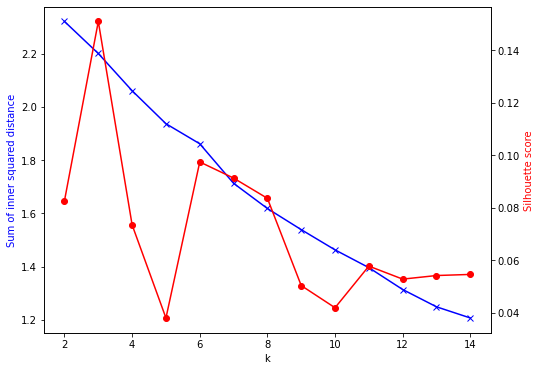

In [62]:
fig, ax1 = plt.subplots(figsize=(8, 6))

ax2 = ax1.twinx()
ax1.plot(K, Sum_of_squared_distances, 'bx-')
ax2.plot(K, sil_scores, 'ro-')

ax1.set_xlabel(r'k')
ax1.set_ylabel('Sum of inner squared distance', color='b')
ax2.set_ylabel('Silhouette score', color='r')

plt.show()

Based on the previous results, Elbow Method and Silhouette Score, we will define ***k = 7***

In [63]:
# set number of clusters
kclusters = 7

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(brkl_grouped_clustering)

# check cluster labels generated for each row in the dataframe
print(kmeans.labels_[0:])

[2 1 1 1 3 1 0 2 1 4 1 2 1 1 0 2 1 1 6 2 2 1 2 2 2 1 2 1 1 1 1 2 1 1 0 2 5
 2 1 2 0 1 1 0 1 2 2 1 1 2 1 1 1 2]


In [64]:
brkl_grouped_clustering.head()

,ATM,Accessories Store,Adult Boutique,American Restaurant,Antique Shop,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Bookstore,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Buffet,Burger Joint,Burmese Restaurant,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Café,Cajun / Creole Restaurant,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Caucasian Restaurant,Cha Chaan Teng,Check Cashing Service,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Community Center,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distillery,Dive Bar,Dog Run,Donut Shop,Dry Cleaner,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Empanada Restaurant,Entertainment Service,Ethiopian Restaurant,Event Service,Event Space,Factory,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gymnastics Gym,Halal Restaurant,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Herbs & Spices Store,Historic Site,History Museum,Hobby Shop,Hockey Field,Home Service,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Intersection,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Kitchen Supply Store,Korean Restaurant,Latin American Restaurant,Library,Lingerie Store,Liquor Store,Lounge,Market,Martial Arts School,Massage Studio,Mattress Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Motorcycle Shop,Movie Theater,Moving Target,Museum,Music Store,Music Venue,Nail Salon,Neighborhood,New American Restaurant,Nightclub,Non-Profit,Noodle House,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Other Nightlife,Other Repair Shop,Outdoor Gym,Outdoors & Recreation,Outlet Store,Pakistani Restaurant,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Peruvian Restaurant,Pet Store,Pharmacy,Photography Studio,Pie Shop,Piercing Parlor,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Polish Restaurant,Pool Hall,Print Shop,Pub,Racetrack,Ramen Restaurant,Record Shop,Rental Car Location,Rental Service,Residential Building (Apartment / Condo),Restaurant,Rock Club,Roof Deck,Russian Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shabu-Shabu Restaurant,Shanghai Restaurant,Shipping Store,Shoe Store,Shopping Mall,Skating Rink,Ski Area,Smoke Shop,Snack Place,Soccer Field,South American Restaurant,Southern / Soul Food Restaurant,Souvlaki Shop,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Supermarket,Supplement Shop,Surf Spot,Sushi Restaurant,Szechuan Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tattoo Parlor,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Park Ride / Attraction,Thrift / Vintage Store,Tiki Bar,Toy / Game Store,Turkish Restaurant,Used Bookstore,Vape Sto

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [65]:
df_merged.rename(columns={'Name':'Neighborhood'}, inplace = True)

In [66]:
df_merged.head()

,Neighborhood,Borough,Long,Lat,Median Household Income ($)
0,Bath Beach,Brooklyn,-73.998752,40.599519,55193
1,Bay Ridge,Brooklyn,-74.030621,40.625801,57980
2,Bedford Stuyvesant,Brooklyn,-73.941785,40.687232,37343
3,Bensonhurst,Brooklyn,-73.995180,40.611009,46137
4,Bergen Beach,Brooklyn,-73.898556,40.615150,72158


In [67]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

brkl_merged = df_merged

# merge brkl_grouped with df_merged to add latitude/longitude and median household income for each neighborhood
brkl_merged = brkl_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

brkl_merged.head()

,Neighborhood,Borough,Long,Lat,Median Household Income ($),Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bath Beach,Brooklyn,-73.998752,40.599519,55193,2,Chinese Restaurant,Pharmacy,Gas Station,Pizza Place,Fast Food Restaurant,Italian Restaurant,Donut Shop,Sushi Restaurant,Bubble Tea Shop,Burger Joint
1,Bay Ridge,Brooklyn,-74.030621,40.625801,57980,1,Spa,Pizza Place,Italian Restaurant,American Restaurant,Pharmacy,Chinese Restaurant,Greek Restaurant,Bar,Bagel Shop,Playground
2,Bedford Stuyvesant,Brooklyn,-73.941785,40.687232,37343,1,Coffee Shop,Bar,Playground,Pizza Place,Deli / Bodega,Bus Stop,Café,Discount Store,Gift Shop,Boutique
3,Bensonhurst,Brooklyn,-73.995180,40.611009,46137,1,Chinese Restaurant,Ice Cream Shop,Italian Restaurant,Donut Shop,Sushi Restaurant,Cosmetics Shop,Shabu-Shabu Restaurant,Coffee Shop,Grocery Store,Supermarket
4,Bergen Beach,Brooklyn,-73.898556,40.615150,72158,3,Harbor / Marina,Playground,Baseball Field,Athletics & Sports,Park,Hockey Field,Rental Service,Opera House,Optical Shop,Noodle House


Finally, let's visualize the resulting clusters

In [68]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(brkl_merged['Lat'], brkl_merged['Long'], brkl_merged['Neighborhood'], brkl_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' - Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [69]:
brkl_merged.loc[brkl_merged['Cluster Labels'] == 0, brkl_merged.columns[[0] + list(range(6, brkl_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,Borough Park,Bank,Pizza Place,Pharmacy,Fast Food Restaurant,Café,Deli / Bodega,Hotel,Chinese Restaurant,Coffee Shop,Farmers Market
14,Crown Heights,Pizza Place,Café,Museum,Bakery,Deli / Bodega,Salon / Barbershop,Coffee Shop,Convenience Store,Cosmetics Shop,Bagel Shop
34,Manhattan Beach,Bus Stop,Café,Food,Playground,Beach,Sandwich Place,Harbor / Marina,Ice Cream Shop,Organic Grocery,Optical Shop
40,Ocean Parkway,Sushi Restaurant,Pizza Place,Bagel Shop,Steakhouse,Paper / Office Supplies Store,Men's Store,Gift Shop,General Entertainment,Sake Bar,Liquor Store
41,Ocean Parkway,Sushi Restaurant,Pizza Place,Bagel Shop,Steakhouse,Paper / Office Supplies Store,Men's Store,Gift Shop,General Entertainment,Sake Bar,Liquor Store
44,Prospect Lefferts Gardens,Café,Pizza Place,Caribbean Restaurant,Bakery,Deli / Bodega,Liquor Store,Indian Restaurant,Sushi Restaurant,Food,Pet Store


In [70]:
brkl_merged.loc[brkl_merged['Cluster Labels'] == 1, brkl_merged.columns[[0] + list(range(6, brkl_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Bay Ridge,Spa,Pizza Place,Italian Restaurant,American Restaurant,Pharmacy,Chinese Restaurant,Greek Restaurant,Bar,Bagel Shop,Playground
2,Bedford Stuyvesant,Coffee Shop,Bar,Playground,Pizza Place,Deli / Bodega,Bus Stop,Café,Discount Store,Gift Shop,Boutique
3,Bensonhurst,Chinese Restaurant,Ice Cream Shop,Italian Restaurant,Donut Shop,Sushi Restaurant,Cosmetics Shop,Shabu-Shabu Restaurant,Coffee Shop,Grocery Store,Supermarket
5,Boerum Hill,Coffee Shop,Dance Studio,Bar,Bakery,French Restaurant,Furniture / Home Store,Arts & Crafts Store,Sandwich Place,Yoga Studio,Gym / Fitness Center
8,Brooklyn Heights,Deli / Bodega,Yoga Studio,Cosmetics Shop,Italian Restaurant,Coffee Shop,Pizza Place,Pharmacy,Gym,Bar,Park
10,Carroll Gardens,Italian Restaurant,Coffee Shop,Bakery,Pizza Place,Cocktail Bar,Spa,Wine Shop,Bar,Food & Drink Shop,Beer Garden
12,Clinton Hill,Italian Restaurant,Pizza Place,Thai Restaurant,Wine Shop,Mexican Restaurant,Yoga Studio,Indian Restaurant,Restaurant,Grocery Store,Diner
13,Cobble Hill,Pizza Place,Playground,Coffee Shop,Cocktail Bar,Bakery,Deli / Bodega,Italian Restaurant,Bar,Chinese Restaurant,Dive Bar
16,Downtown,Coffee Shop,Burger Joint,Chinese Restaurant,Spa,Sandwich Place,Bakery,Pizza Place,Bubble Tea Shop,Residential Building (Apartment / Condo),Performing Arts Venue
17,Dumbo,Park,Bakery,Scenic Lookout,Café,Ice Cream Shop,Gym,Italian Restaurant,Boxing Gym,Yoga Studio,Dog Run


In [71]:
brkl_merged.loc[brkl_merged['Cluster Labels'] == 2, brkl_merged.columns[[0] + list(range(6, brkl_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bath Beach,Chinese Restaurant,Pharmacy,Gas Station,Pizza Place,Fast Food Restaurant,Italian Restaurant,Donut Shop,Sushi Restaurant,Bubble Tea Shop,Burger Joint
7,Brighton Beach,Eastern European Restaurant,Restaurant,Russian Restaurant,Sushi Restaurant,Pharmacy,Beach,Gourmet Shop,Mobile Phone Shop,Bank,Non-Profit
11,City Line,Donut Shop,Mobile Phone Shop,Fried Chicken Joint,Liquor Store,Grocery Store,Cuban Restaurant,Clothing Store,Pet Store,Cosmetics Shop,Sandwich Place
15,Cypress Hills,Latin American Restaurant,Ice Cream Shop,Fried Chicken Joint,Metro Station,Food,Seafood Restaurant,Mobile Phone Shop,South American Restaurant,Supermarket,Chinese Restaurant
19,East Flatbush,Chinese Restaurant,Supermarket,Fast Food Restaurant,Park,Caribbean Restaurant,Liquor Store,Pharmacy,Moving Target,Department Store,Wine Shop
20,East New York,Bus Station,Event Service,Fast Food Restaurant,Salon / Barbershop,Spanish Restaurant,Fried Chicken Joint,Deli / Bodega,Plaza,Metro Station,Pizza Place
22,Erasmus,Caribbean Restaurant,Grocery Store,Pharmacy,Yoga Studio,Convenience Store,Food Truck,Music Venue,Mobile Phone Shop,Gym / Fitness Center,School
23,Flatbush,Coffee Shop,Juice Bar,Deli / Bodega,Caribbean Restaurant,Pizza Place,Pharmacy,Middle Eastern Restaurant,Mexican Restaurant,Metro Station,Sandwich Place
24,Flatlands,Pharmacy,Fast Food Restaurant,Fried Chicken Joint,Caribbean Restaurant,Video Store,Park,Chinese Restaurant,Paper / Office Supplies Store,Bar,Lounge
26,Georgetown,Bank,Pharmacy,Shopping Mall,Clothing Store,Seafood Restaurant,Miscellaneous Shop,Breakfast Spot,Mexican Restaurant,Shipping Store,Cosmetics Shop


In [72]:
brkl_merged.loc[brkl_merged['Cluster Labels'] == 3, brkl_merged.columns[[0] + list(range(6, brkl_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,Bergen Beach,Harbor / Marina,Playground,Baseball Field,Athletics & Sports,Park,Hockey Field,Rental Service,Opera House,Optical Shop,Noodle House


In [73]:
brkl_merged.loc[brkl_merged['Cluster Labels'] == 4, brkl_merged.columns[[0] + list(range(6, brkl_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
9,Canarsie,Asian Restaurant,Bus Line,Chinese Restaurant,Deli / Bodega,Gym,Grocery Store,Home Service,Caribbean Restaurant,Thai Restaurant,Food


In [74]:
brkl_merged.loc[brkl_merged['Cluster Labels'] == 5, brkl_merged.columns[[0] + list(range(6, brkl_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
36,Midwood,Pizza Place,ATM,Pharmacy,Bakery,Bagel Shop,Convenience Store,Candy Store,Video Game Store,Ice Cream Shop,Other Great Outdoors


In [75]:
brkl_merged.loc[brkl_merged['Cluster Labels'] == 6, brkl_merged.columns[[0] + list(range(6, brkl_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
18,Dyker Heights,Burger Joint,Golf Course,Dance Studio,Grocery Store,Playground,Bagel Shop,Outlet Store,Outdoors & Recreation,Outdoor Gym,Other Repair Shop


In [78]:
brkl_venues.head(2)

,Neighborhood,Neighborhood Lat.,Neighborhood Long.,Venue,Venue Lat.,Venue Long.,Venue Category
0,Bath Beach,40.599519,-73.998752,Bensonhurst Park,40.597065,-73.998340,Park
1,Bath Beach,40.599519,-73.998752,Bay Parkway Water Front,40.595941,-74.000917,Surf Spot


In [79]:
brkl_merged.head(2)

,Neighborhood,Borough,Long,Lat,Median Household Income ($),Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bath Beach,Brooklyn,-73.998752,40.599519,55193,2,Chinese Restaurant,Pharmacy,Gas Station,Pizza Place,Fast Food Restaurant,Italian Restaurant,Donut Shop,Sushi Restaurant,Bubble Tea Shop,Burger Joint
1,Bay Ridge,Brooklyn,-74.030621,40.625801,57980,1,Spa,Pizza Place,Italian Restaurant,American Restaurant,Pharmacy,Chinese Restaurant,Greek Restaurant,Bar,Bagel Shop,Playground


Let's visualize the amount of venues per cluster.

In [80]:
#Merge the 2 dataframes to get the cluster id per neighborhood
venues_by_cluster = pd.merge(brkl_venues,brkl_merged[['Neighborhood','Cluster Labels']], on='Neighborhood')
venues_by_cluster = venues_by_cluster.groupby(['Cluster Labels','Venue Category'])[['Venue Category']].count()
venues_by_cluster.rename(columns={'Venue Category':'Total'}, inplace=True)
venues_by_cluster.reset_index(inplace=True)
venues_by_cluster.head()

,Cluster Labels,Venue Category,Total
0,0,American Restaurant,2
1,0,Bagel Shop,5
2,0,Bakery,9
3,0,Bank,4
4,0,Beach,1


In [81]:
#Function to plot the total amount of the first 10 venues by cluster
def plot_total_per_cluster(id, df):
    max = 15
    if df.shape[0] > max:
        y_pos = np.arange(max)
        data_for_show = df.head(max)
    else:
        y_pos = np.arange(df.shape[0])
        data_for_show = df
    #plot data
    plt.bar(y_pos, data_for_show['Total'], align='center', alpha=0.6)
    plt.xticks(y_pos, data_for_show['Venue Category'], rotation = 90)
    plt.ylabel('#')
    plt.title('Cluster {}'.format(id))
    plt.show()       

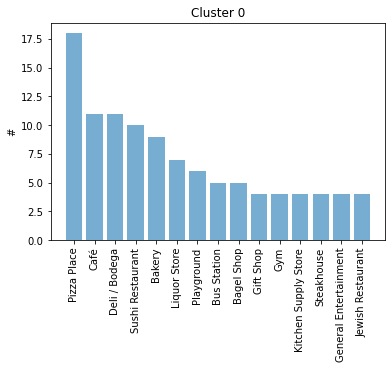

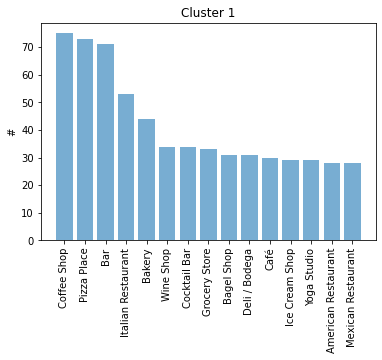

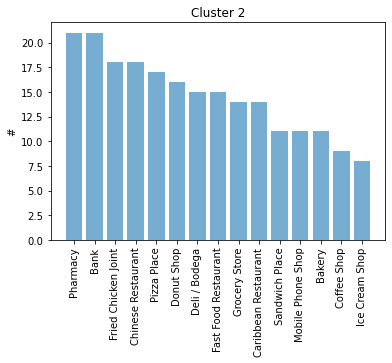

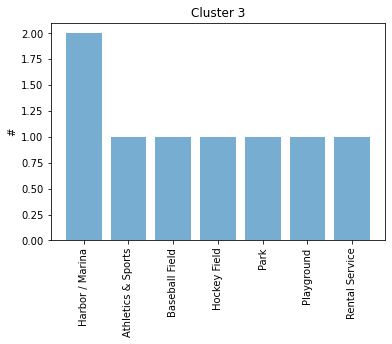

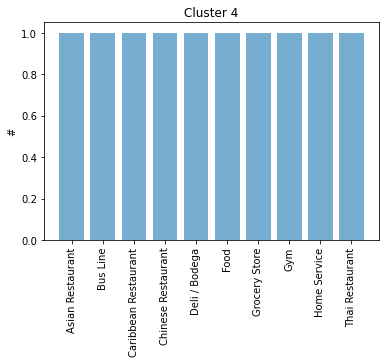

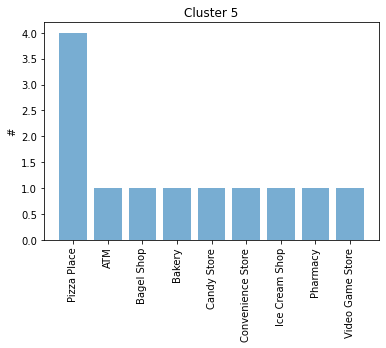

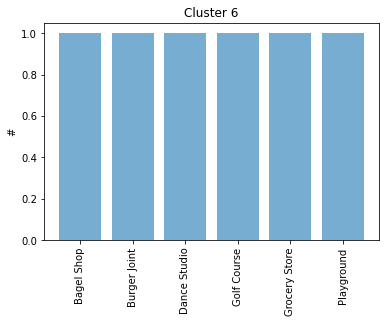

In [82]:
for n in range(kclusters):
    aux_df = venues_by_cluster.loc[(venues_by_cluster['Cluster Labels']==n)]
    aux_df = aux_df.sort_values(by=['Total'], ascending=False)
    plot_total_per_cluster(n, aux_df)

One of the requirements it's related with **Median Household Income**. Our future venue should be located in one of the neighboords with an high Income ($). Let's check the top 10 Neighborhoods.

In [87]:
#brkl_merged.head()
highest_income = brkl_merged.sort_values('Median Household Income ($)', ascending = False, ignore_index=True).head(10)
highest_income.head(10)

,Neighborhood,Borough,Long,Lat,Median Household Income ($),Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Cobble Hill,Brooklyn,-73.998562,40.687920,105398,1,Pizza Place,Playground,Coffee Shop,Cocktail Bar,Bakery,Deli / Bodega,Italian Restaurant,Bar,Chinese Restaurant,Dive Bar
1,Brooklyn Heights,Brooklyn,-73.993782,40.695864,105398,1,Deli / Bodega,Yoga Studio,Cosmetics Shop,Italian Restaurant,Coffee Shop,Pizza Place,Pharmacy,Gym,Bar,Park
2,Gowanus,Brooklyn,-73.994441,40.673932,101784,1,Bar,Pizza Place,Furniture / Home Store,Italian Restaurant,Playground,Gym / Fitness Center,Art Gallery,Wine Shop,Chinese Restaurant,Coffee Shop
3,Park Slope,Brooklyn,-73.977050,40.672321,101784,1,Coffee Shop,Pizza Place,Burger Joint,Bagel Shop,Pet Store,Spa,Italian Restaurant,Pub,Bookstore,Bakery
4,Carroll Gardens,Brooklyn,-73.994654,40.680541,85496,1,Italian Restaurant,Coffee Shop,Bakery,Pizza Place,Cocktail Bar,Spa,Wine Shop,Bar,Food & Drink Shop,Beer Garden
5,Red Hook,Brooklyn,-74.012759,40.676254,85496,1,Seafood Restaurant,Art Gallery,Park,American Restaurant,Farm,Pizza Place,Bar,Brewery,Bagel Shop,Café
6,Dumbo,Brooklyn,-73.988753,40.703177,84945,1,Park,Bakery,Scenic Lookout,Café,Ice Cream Shop,Gym,Italian Restaurant,Boxing Gym,Yoga Studio,Dog Run
7,Vinegar Hill,Brooklyn,-73.981116,40.703322,84945,1,Food Truck,Café,Coffee Shop,Ice Cream Shop,Park,Bookstore,Performing Arts Venue,Historic Site,Bike Rental / Bike Share,Scenic Lookout
8,Downtown,Brooklyn,-73.983463,40.690844,84945,1,Coffee Shop,Burger Joint,Chinese Restaurant,Spa,Sandwich Place,Bakery,Pizza Place,Bubble Tea Shop,Residential Building (Apartment / Condo),Performing Arts Venue
9,Boerum Hill,Brooklyn,-73.983748,40.685683,84945,1,Coffee Shop,Dance Studio,Bar,Bakery,French Restaurant,Furniture / Home Store,Arts & Crafts Store,Sandwich Place,Yoga Studio,Gym / Fitness Center


It's possible to verify that 10 out of 10 neighborhoods belong to the Cluster 1.

In [88]:
#Let's check their location
map_Brooklyn = folium.Map(location=[latitude, longitude], zoom_start=13)

for lat, lng, neighborhood, income, clusterID in zip(highest_income['Lat'], highest_income['Long'], highest_income['Neighborhood'], highest_income['Median Household Income ($)'], highest_income['Cluster Labels']):
    label = 'Cluster {} - {}, {}'.format(clusterID, neighborhood, income)
    label = folium.Popup(label, parse_html=True)
    if clusterID == 1:
        color = 'green'
    else:
        color = 'red'
    folium.CircleMarker([lat, lng], radius=5, popup=label, color=color, parse_html=False).add_to(map_Brooklyn)
map_Brooklyn

We can see that all neighborhoods with an high income are located in the North of Brooklyn. 

One of the other requirements for our future venue is the location. It should be located near a **Portuguese Restaurant** and it shouldn't be near **Wine shops** or **Wine Bars** within a radius of 500 meters, or at least stay in a place where the number of **Wine stores/bars is very low**. First let's check where we can find Portuguese Restaurants.

In [89]:
brkl_venues[brkl_venues['Venue Category']=='Portuguese Restaurant'].groupby('Venue Category').count()

,Neighborhood,Neighborhood Lat.,Neighborhood Long.,Venue,Venue Lat.,Venue Long.
Venue Category,,,,,,


Unfortunally, we can see that there **isn't any Portuguese restaurants** in the selected neighborhoods. So let's select only the Wine Shops and Wine bars and plot the result on our map.

In [90]:
brkl_venues[(brkl_venues['Venue Category']=='Wine Shop') | (brkl_venues['Venue Category']=='Wine Bar')].groupby('Venue Category')['Neighborhood'].count()

Venue Category
Wine Bar     23
Wine Shop    36
Name: Neighborhood, dtype: int64

In [91]:
wine_venues = brkl_venues[(brkl_venues['Venue Category']=='Wine Shop') | (brkl_venues['Venue Category']=='Wine Bar')]
wine_venues.head()

,Neighborhood,Neighborhood Lat.,Neighborhood Long.,Venue,Venue Lat.,Venue Long.,Venue Category
137,Bedford Stuyvesant,40.687232,-73.941785,Bed-Vyne Wine & Spirits,40.684668,-73.944363,Wine Shop
157,Bedford Stuyvesant,40.687232,-73.941785,UnWine Bed Stuy,40.683112,-73.943878,Wine Bar
262,Boerum Hill,40.685683,-73.983748,Free Range Wines & Spirits,40.688037,-73.987610,Wine Shop
385,Brooklyn Heights,40.695864,-73.993782,Michael-Towne Wines And Spirits,40.697625,-73.992883,Wine Shop
416,Brooklyn Heights,40.695864,-73.993782,Montague Wine & Spirits,40.695281,-73.996198,Wine Shop


In [98]:
from folium import plugins
from folium.plugins import HeatMap

#Location of the venues
map_venues = folium.Map(location=[latitude, longitude], zoom_start=12)

# List comprehension to make out list of lists
heat_data = [[row['Venue Lat.'],row['Venue Long.']] for index, row in wine_venues.iterrows()]

# Plot it on the map
HeatMap(heat_data).add_to(map_venues)

#Plot the neighborhoods
for lat, lng, neighborhood, income, clusterID in zip(highest_income['Lat'], highest_income['Long'], highest_income['Neighborhood'], highest_income['Median Household Income ($)'], highest_income['Cluster Labels']):
    label = 'Cluster {} - {}, {}'.format(clusterID, neighborhood, income)
    label = folium.Popup(label, parse_html=True)
    if clusterID == 1:
        color = 'green'
    else:
        color = 'red'
    folium.CircleMarker([lat, lng], radius=5, popup=label, color=color, parse_html=False).add_to(map_venues)

map_venues

It's possible to visible that we have more of wine venues located at North of Brooklyn.

In [97]:
#Location of the venues
map_venues = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for neighborhood, lat, long, venue, cat in zip(wine_venues['Neighborhood'], wine_venues['Venue Lat.'], wine_venues['Venue Long.'], wine_venues['Venue'], wine_venues['Venue Category']):
    label = '{}, {}'.format(venue, neighborhood)
    label = folium.Popup(label, parse_html=True)
    color = ''
    if cat == 'Wine Shop':
        color ='red'
    else:
        color = 'yellow'  
    folium.CircleMarker([lat, long], radius=3, popup=label,color=color, fill=True, fill_color=color, fill_opacity=1, parse_html=False).add_to(map_venues)

# List comprehension to make out list of lists
heat_data = [[row['Venue Lat.'],row['Venue Long.']] for index, row in wine_venues.iterrows()]

# Plot it on the map
HeatMap(heat_data).add_to(map_venues)

map_venues

It seems that we only have one neighbourhood without any Wine bar or wine store in the surroundings: **Park Slope**

According to several websites:
1. *Park Slope is considered one of New York City's most desirable neighborhoods. In 2010, it was ranked number 1 in New York by New York Magazine, citing its quality public schools, dining, nightlife, shopping, access to public transit, green space, safety, and creative capital, among other aspects.* [Wikipedia]
2. *After so many trips to New York (>50), we wanted to do something else and Park Slope is absolutely the best neighbourhood to stay. It is relaxed, people are friendly and extremely helpful and. you can find everything you need and if you are desperate for big city live, it only takes 30 minutes and you are back in downtown Manhattan.* [TripAdvisor comment]
3. *Family-friendly neighborhood hub in the heart of Brooklyn. Close to major railways and subways and Barclay's Center. Offers great shopping and dining options. The safety level is better than other areas of Brooklyn but could use some improvement at nighttime.* [Niche.com]

## Results and Discussion

One of the main objectives of our study was to find an optimal place to open our Wine Store close to Portuguese Restaurant. However, it was found that there isn't any Portuguese Restaurant in Brooklyn.

After using K-Means algorithm for clustering our data, it was choosen to divide into 7 clusters, based on Elbow method and Silhouete Score. The most notorious clusters, with more venues, were Cluster 0, 1 and 2. Cluster 0 is categorized for having mostly Pizza & Café venues and some necessary facilities (Banks, Pharmacies). This cluster is composed of 5 neighborhoods. Cluster 1 is the biggest cluster with 27 neighborhoods. Almost all neighborhoods of this cluster are located up north of Brooklyn. Coffee Shops, Pizza places, Italian Restaurants and bars are predominant in this cluster. As we can see too, the top 10 Neighborhoods with the highest income are from Cluster 1.

Another aspect that was important for our client it was the distance for another Wine venue. Based on the venues discovered by FourSquare API, we got a total of **23 Wine bars** and **36 Wine Shops**. Mostly are also located up North of Brooklyn.

It was important too, choose a neighborhood with an high income. Based on these important characteristics for our client at the end we chose **Park Slope**. 


## Conclusion

The purpose of this project was to identify a neighborhood with a Portuguese in the vicinity, with low wine venues around and the population should have an high income in order to aid our client to choose a best place to open her new Portuguese Wine bar. Using Foursquare data and clustering the venues using K-means we only identified one neighborhood that met this conditions. It was Park Slope.

However it's necessary to do a further analysis to identify the best place in Park Slope. Final decision for an optimal location for the wine bar will be made by the client based on specific characteristics of locations based in the neighborhood, taking into consideration additional factors like attractiveness of each location (proximity to park or water), proximity to other Mediterrain restaurants (because it was not possible to find a portuguese restaurant), real estate availability, prices...